## 1- Importing Libraries

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## 2- Loading Model

**Download The Model:** 

['colorization_release_v2.caffemodel'](https://storage.openvinotoolkit.org/repositories/datumaro/models/colorization/)

In [2]:
net = cv2.dnn.readNetFromCaffe('model/colorization_deploy_v2.prototxt', 'model/colorization_release_v2.caffemodel')

pts = np.load('model/pts_in_hull.npy')

class8 = net.getLayerId("class8_ab")
conv8 = net.getLayerId("conv8_313_rh")

pts = pts.transpose().reshape(2, 313, 1, 1)

net.getLayer(class8).blobs = [pts.astype(np.float32)]
net.getLayer(conv8).blobs = [np.full([1, 313], 2.606, np.float32)]

## 3- Loading Image

In [3]:
image = cv2.imread('input_bw_image.jpg')

scaled = image.astype(np.float32) / 255.0
lab = cv2.cvtColor(scaled, cv2.COLOR_BGR2LAB)
L = lab[:, :, 0]

L_resized = cv2.resize(L, (224, 224))
L_resized = L_resized - 50

## 4- Running The Model

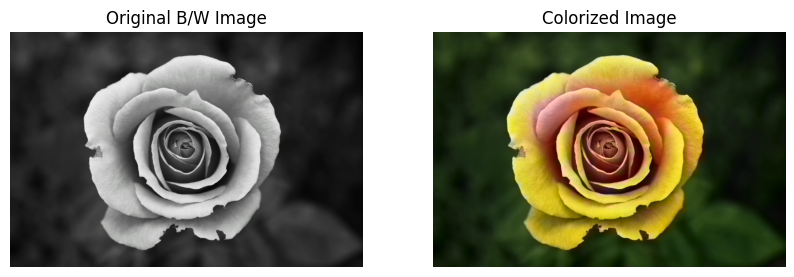

In [8]:
net.setInput(cv2.dnn.blobFromImage(L_resized))
ab = net.forward()[0, :, :, :].transpose((1, 2, 0))

ab = cv2.resize(ab, (image.shape[1], image.shape[0]))
lab_out = np.concatenate((L[:, :, np.newaxis], ab), axis=2)

colorized = cv2.cvtColor(lab_out, cv2.COLOR_LAB2BGR)
colorized = np.clip(colorized, 0, 1)
rgb_colorized = (colorized * 255).astype(np.uint8)


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original B/W Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(rgb_colorized, cv2.COLOR_BGR2RGB))
plt.title('Colorized Image')
plt.axis('off')

plt.show()

## 5- Saving Finall Result

In [9]:
cv2.imwrite('colorized_image.jpg', (colorized * 255).astype(np.uint8))

True